In [66]:
from __future__ import print_function

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn

import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display,core
from dtw import dtw
from numpy import linalg as LA
from math import sqrt
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_predict, cross_val_score,cross_validate
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
#%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import time

In [67]:
def accuracy(prediction,actual):
    count=0
    l=len(prediction)
    for i in range(l):
        if(prediction[i]==actual[i]):
            count+=1
    return count/l*100

In [68]:
# def createTrainingData(start, end):
#     samples = []
#     lin=[376,248,251]
#     lam=[334,339,294]
#     lsc=[234,237,241,246,247,249,252,255,260,262,263,264,265,271,275,281,284,285]
#     lsa=[314,323,336,347]
#     lir=[245,266,283,288,295,298,313,340,364]
#     lbr=[225,226,227,228,229,230,231,232,233,236,239,240,243,244,250,254,256,257,258,259,267,268,269,270]

#     l1=lin
#     l2=lam

#     '''a,s=librosa.load("C:\\Users\\Dell\\Desktop\\appa.m4a")
#     mfcc1= librosa.feature.mfcc(y=a,sr=s)
#     newind=[]
#     concatfeatures(newind,mfcc1)
#     newind=np.asarray(newind)
#     #for v in range(10):
#     samples.append([newind[0],1))'''
#    # print(newind[0])
#     for q,r in zip (l1,l2):
#         for i in range(1,10):
#             ind=0
#             am=0
#             path1 = "./Indian/p"+str(q)+"/p"+str(q)+"_00"+str(i)+".wav"
#             path2 = "./American/p"+str(r)+"/p"+str(r)+"_00"+str(i)+".wav"
#             print(path1, path2)
#             try:
#                 a,s=librosa.load(path1)
#             except:
#                 ind=1
#             try:
#                 b,t=librosa.load(path2)
#             except:
#                 am=1
#             if(ind==0 and am==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp1=mfcc1.T[1][start:end]
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 samples.append([temp2,0])
#                 print('*', end=' ')
#             elif(ind==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 temp1=mfcc1.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 print('$', end=' ')
#             elif(am==0):
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp2,0])
#                 print('#', end=' ')
#             else: continue
#         print('\n')
#         for i in range(10,100):
#             ind=0
#             am=0
#             print(path1, path2)
#             try:
#                 a,s=librosa.load(path1)
#             except:
#                 ind=1
#             try:
#                 b,t=librosa.load(path2)
#             except:
#                 am=1
#             if(ind==0 and am==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp1=mfcc1.T[1][start:end]
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 samples.append([temp2,0])
#                 print('*', end=' ')
#             elif(ind==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 temp1=mfcc1.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 print('$', end=' ')
#             elif(am==0):
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp2,0])
#                 print('#', end=' ')
#             else: continue
#         print('\n')
#         for i in range(100,430):
#             ind=0
#             am=0
#             try:
#                 a,s=librosa.load(path1)
#             except:
#                 ind=1
#             try:
#                 b,t=librosa.load(path2)
#             except:
#                 am=1
#             if(ind==0 and am==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp1=mfcc1.T[1][start:end]
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 samples.append([temp2,0])
#                 print('*', end=' ')
#             elif(ind==0):
#                 mfcc1= librosa.feature.mfcc(y=a,sr=s)
#                 temp1=mfcc1.T[1][start:end]
#                 for frame in range(10,50):
#                     temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
#                 samples.append([temp1,1])
#                 print('$', end=' ')
#             elif(am==0):
#                 mfcc2= librosa.feature.mfcc(y=b,sr=t)
#                 temp2=mfcc2.T[1][start:end]
#                 for frame in range(10,50):
#                     temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
#                 samples.append([temp2,0])
#                 print('#', end=' ')
#             else: continue
#         print('\n')

#     print(len(samples))
#     X = [i[0] for i in samples]
#     Y = [j[1] for j in samples]
#     return X,Y

# def concatfeatures(realdata, mfcc1):
#     temp1=mfcc1.T[1][1:19]
#     for frame in range(10,50):
#         temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
#     #print(temp1)
#     realdata.append(temp1)

# def concatfeatures1(realdata, mfcc1):
#     temp1=mfcc1.T[1][1:13]
#     for frame in range(10,50):
#         temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
#     #print(temp1)
#     realdata.append(temp1)

In [69]:
def createTrainingData(start, end):
    samples = []
    l1=[376,248,251]
    l2=[334,339,294]
     
    '''a,s=librosa.load("C:\\Users\\Dell\\Desktop\\appa.m4a")
    mfcc1= librosa.feature.mfcc(y=a,sr=s)
    newind=[]
    concatfeatures(newind,mfcc1)
    newind=np.asarray(newind)
    #for v in range(10):
    samples.append([newind[0],1))'''
   # print(newind[0])
    for q,r in zip (l1,l2):
       
        for i in range(1,10):
            ind=0
            am=0
            try: 
                a,s=librosa.load("./Indian/p"+str(q)+"_00"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_00"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(10,100):
            ind=0
            am=0
            try: 
                a,s=librosa.load("./Indian/p"+str(q)+"_0"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_0"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(100,430):
            ind=0
            am=0
            try: 
                a,s=librosa.load("./Indian/p"+str(q)+"_"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
   
    print(len(samples))
    X = [i[0] for i in samples]
    Y = [j[1] for j in samples]
    return X,Y

def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    #print(temp1)
    realdata.append(temp1)
    
def concatfeatures1(realdata, mfcc1):
    temp1=mfcc1.T[1][1:13]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
    #print(temp1)
    realdata.append(temp1)

In [70]:
data, labels = createTrainingData(1,19)

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * 

/tmp/ipykernel_23561/3998533717.py:59: UserWarning: PySoundFile failed. Trying audioread instead.
  a,s=librosa.load("./Indian/p"+str(q)+"_0"+str(i)+".wav")
/media/david/Backup/mest-diego/reproducao/env/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


* * * * * * * # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * $ 

/tmp/ipykernel_23561/3998533717.py:102: UserWarning: PySoundFile failed. Trying audioread instead.
  b,t=librosa.load("./American/p"+str(r)+"_"+str(i)+".wav")


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * 

/tmp/ipykernel_23561/3998533717.py:98: UserWarning: PySoundFile failed. Trying audioread instead.
  a,s=librosa.load("./Indian/p"+str(q)+"_"+str(i)+".wav")


* * * * * * * * # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * $ * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [71]:
labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data,labels)

In [73]:
knn = LogisticRegression()
scores = cross_val_score(knn, data, labels, cv=10, scoring='f1_macro')
scores.mean(),scores.std()              

/media/david/Backup/mest-diego/reproducao/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/media/david/Backup/mest-diego/reproducao/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

(0.9491719580569239, 0.032401134641349055)

In [74]:
Counter(labels)

Counter({0: 1269, 1: 1032})

In [75]:
X_train, X_test, y_train, y_test  = train_test_split(data,labels)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 972), (1, 972)]


In [76]:
s=time.time()
g = LogisticRegression()
g.fit(X_train,y_train)
pred = g.predict(X_test)
print(time.time()-s)

0.09166860580444336


/media/david/Backup/mest-diego/reproducao/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
confusion_matrix(y_test, pred)

array([[287,  10],
       [ 11, 268]])

In [78]:
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)

287 10 11 268


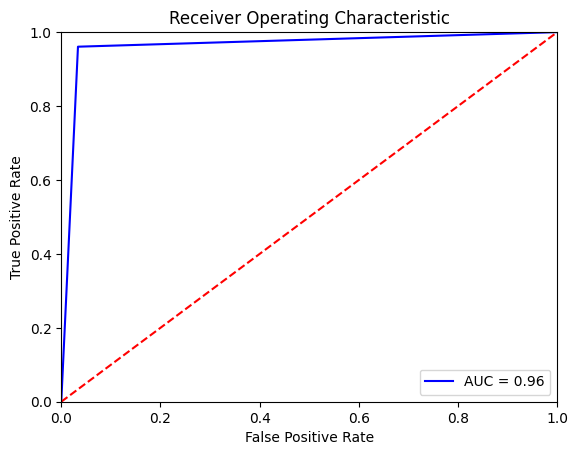

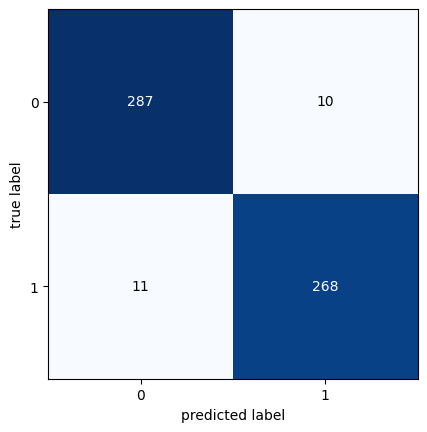

In [79]:
def plotCurve(y_test1,y_pred,name):   
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc
auc = plotCurve(y_test,pred.round(),'lr-aoc')

binary = confusion_matrix(y_test,pred)
fig, ax = plot_confusion_matrix(conf_mat=binary)
n = '../lr.png'
plt.savefig(n)
plt.show()

In [80]:
precision = round(tp/(tp+fp),4)
recall = round(tp/(tp+fn),4)
fmeasure = round(2*((precision*recall)/(precision+recall)),4)
rej = round(tn/(tn+fp),4)
acc = round((tn+tp)/(tn+tp+fp+fn),4)

In [81]:
print(precision,recall,fmeasure,rej,acc)

0.964 0.9606 0.9623 0.9663 0.9635
